In [299]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [44]:
import nltk
#nltk.download()

In [45]:
from nltk.book import *

In [258]:
df=pd.read_csv('winemag-data_first150k.csv')


In [259]:
df.shape


(150930, 11)

In [260]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [261]:
df.rename(columns={'Unnamed: 0' : 'nothing'},inplace=True)

In [262]:
df.drop(['nothing','region_2'], 1,inplace=True)

In [263]:
df.isnull().sum()/len(df)

country        0.000033
description    0.000000
designation    0.303021
points         0.000000
price          0.090737
province       0.000033
region_1       0.166037
variety        0.000000
winery         0.000000
dtype: float64

In [264]:
df=df.dropna(axis=0,how='any')  ##delet missing value

In [265]:
df.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
dtype: int64

In [266]:
df.describe()

,points,price
count,77284.000000,77284.000000
mean,88.231678,37.584817
std,3.303169,36.403885
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,29.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


In [238]:
df['winery']=df['winery'].str.lower()


In [285]:
names=list(df.columns.values)
names.remove('points')
names.remove('price')
names

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'variety',
 'winery']

In [288]:
for i in names:
    df[i]=df[i].str.lower()

df.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,us,this tremendous 100% varietal wine hails from ...,martha's vineyard,96,235.0,california,napa valley,cabernet sauvignon,heitz
1,spain,"ripe aromas of fig, blackberry and cassis are ...",carodorum selección especial reserva,96,110.0,northern spain,toro,tinta de toro,bodega carmen rodríguez
2,us,mac watson honors the memory of a wine once ma...,special selected late harvest,96,90.0,california,knights valley,sauvignon blanc,macauley
3,us,"this spent 20 months in 30% new french oak, an...",reserve,96,65.0,oregon,willamette valley,pinot noir,ponzi
4,france,"this is the top wine from la bégude, named aft...",la brûlade,95,66.0,provence,bandol,provence red blend,domaine de la bégude


In [289]:
df['winery_count']=df.groupby(['winery'])['points'].transform('count')

In [290]:
df['winery_count'].describe()

count    77284.000000
mean        34.283163
std         40.136611
min          1.000000
25%          9.000000
50%         21.000000
75%         46.000000
max        302.000000
Name: winery_count, dtype: float64

In [291]:
df2=df[(df.winery_count>9) & (df.points>86)]

In [292]:
df2.head()

,country,description,designation,points,price,province,region_1,variety,winery,winery_count
3,us,"this spent 20 months in 30% new french oak, an...",reserve,96,65.0,oregon,willamette valley,pinot noir,ponzi,52
5,spain,"deep, dense and pure from the opening bell, th...",numanthia,95,73.0,northern spain,toro,tinta de toro,numanthia,25
6,spain,slightly gritty black-fruit aromas include a s...,san román,95,65.0,northern spain,toro,tinta de toro,maurodos,10
8,us,this re-named vineyard was formerly bottled as...,silice,95,65.0,oregon,chehalem mountains,pinot noir,bergström,30
14,us,"with its sophisticated mix of mineral, acid an...",grace vineyard,95,185.0,oregon,dundee hills,pinot noir,domaine serene,56


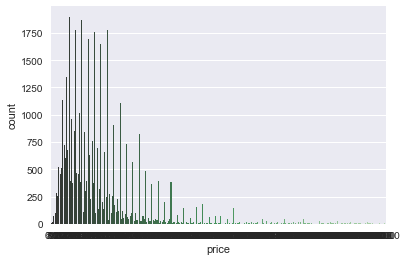

In [294]:
sns.countplot(x='price',data=df2,palette="Greens_d")

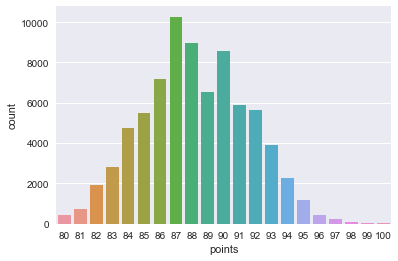

In [296]:
sns.countplot(x='points',data=df)

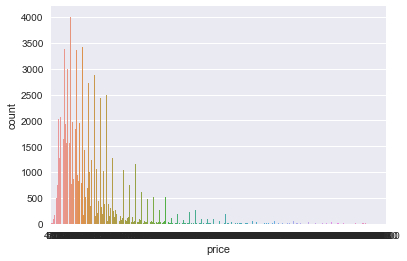

In [297]:
sns.countplot(x='price',data=df)

In [229]:
time=pd.DataFrame(df.winery.value_counts())
data1=data.groupby("designation").filter(lambda g: (g.name != 0) and (g.designation.size >= 100))


Williams Selyem           302
Testarossa                264
Kendall-Jackson           214
Columbia Crest            212
Trapiche                  184
Chateau Ste. Michelle     158
Cameron Hughes            158
De Loach                  157
D'Arenberg                153
Concannon                 149
Iron Horse                141
Morgan                    133
Gary Farrell              132
Yalumba                   129
Penfolds                  119
Bouchard Père & Fils      118
J. Lohr                   115
Sineann                   115
Dutton-Goldfield          115
Dry Creek Vineyard        111
Robert Mondavi            109
Adelaida                  108
Peachy Canyon             108
Rodney Strong             107
De Bortoli                106
Joseph Drouhin            105
Luigi Bosca               104
Raymond                   101
Kenwood                    98
Calera                     97
                         ... 
Old Ghost                   1
Chateau Grand Traverse      1
Domaine du

In [305]:

from sklearn.datasets import load_digits
digits = load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [307]:

array_df=df2.as_matrix()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df2['points'])
y_kmeans = kmeans.predict(df['points'])